##Parameter Sweep

Say we want to run more than one simulation, each with a set of small differences compared to a base configuration.  Generically, this concept is accommodated by the `Builder` class, which is basically a generator that returns a list of functions to apply to the base configuration to make each unique simulation.

The specific example below will generate six simulations for all combinations of 3 random seeds and 2 example study sites, Namawala in Tanzania and Matsari in Nigeria.

Note also that we can pass in configuration parameter overrides directly to the `DTKConfigBuilder` constructor.

In [1]:
from dtk.utils.core.DTKConfigBuilder import DTKConfigBuilder
from dtk.utils.builders.sweep import GenericSweepBuilder

exp_name  = 'SweepDemo'
builder   = GenericSweepBuilder.from_dict({'Run_Number': range(3),
                                           '_site_' : ['Namawala', 'Matsari']})

cb = DTKConfigBuilder.from_defaults('MALARIA_SIM', 
                                    Num_Cores=1, 
                                    Base_Population_Scale_Factor=0.1,
                                    x_Temporary_Larval_Habitat=0.05,
                                    Simulation_Duration=365*5)

run_sim_args =  { 'config_builder' : cb,
                  'exp_name'       : exp_name,
                  'exp_builder'    : builder }

As in the previous example, since we're not using the command-line utility here, we'll rely on a few helper functions, which are defined in the `utils.py` module.

In [2]:
from utils import get_sim_manager, run_demo, monitor_status, draw_plots

sm = get_sim_manager()

In [3]:
run_demo(sm, run_sim_args)

{'exe_name': 'E:\\EMOD\\bin\\6ca93985ebebaa2206e76aedabeae443\\Eradication.exe',
 'exp_id': '2016_02_01_17_25_21_870000',
 'exp_name': 'SweepDemo',
 'location': 'LOCAL',
 'sim_root': 'E:\\EMOD\\simulations_local\\',
 'sim_type': 'MALARIA_SIM',
 'sims': {'2016_02_01_17_25_21_887000': {'Run_Number': 0.0,
   '_site_': 'Namawala',
   'jobId': 3712,
   'population_scale': 1},
  '2016_02_01_17_25_21_907000': {'Run_Number': 0.0,
   '_site_': 'Matsari',
   'jobId': 10828,
   'population_scale': 1},
  '2016_02_01_17_25_21_926000': {'Run_Number': 1.0,
   '_site_': 'Namawala',
   'jobId': 10308,
   'population_scale': 1},
  '2016_02_01_17_25_21_945000': {'Run_Number': 1.0,
   '_site_': 'Matsari',
   'jobId': 11256,
   'population_scale': 1},
  '2016_02_01_17_25_21_964000': {'Run_Number': 2.0,
   '_site_': 'Namawala',
   'jobId': 8392,
   'population_scale': 1},
  '2016_02_01_17_25_21_983000': {'Run_Number': 2.0,
   '_site_': 'Matsari',
   'jobId': 2980,
   'population_scale': 1}}}

The output above should show the metadata for each of the simulations in our sweep.  If we monitor our simulations, we may note they take a bit longer as we are now running the full malaria model rather than the simplified vector model (with generic within-host disease dynamics).

In [4]:
monitor_status(sm)

Finally, let's define the analyzers in a similar fashion as in the previous tutorial.  Note that now we have multiple simulations, so the `plot_grouped_lines` function will draw one line per simulation colored by group (i.e. site).  The default plotting function for the `VectorSpeciesAnalyzer` is just plotting the mean for each group (i.e. mean of random seeds).

In [5]:
from dtk.utils.analyzers import sample_selection, group_by_name, plot_grouped_lines, \
                                TimeseriesAnalyzer, VectorSpeciesAnalyzer

analyzers = [ TimeseriesAnalyzer(
                filename='InsetChart.json',
                channels=['Rainfall', 'Adult Vectors', 'Daily EIR', 'Infected'],
                select_function=sample_selection(freq='W', start_date='1/1/2000'),
                group_function=group_by_name('_site_'),
                plot_function=plot_grouped_lines
                ),
              VectorSpeciesAnalyzer(
                filename='VectorSpeciesReport.json',
                channels=['Adult Vectors', 'Daily EIR'],        
                select_function=sample_selection(freq='W', start_date='1/1/2000'),
                group_function=group_by_name('_site_'),
                )
            ]

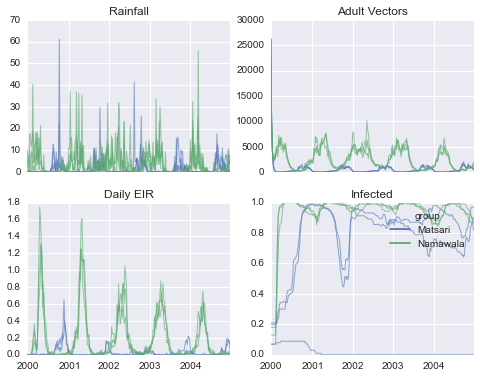

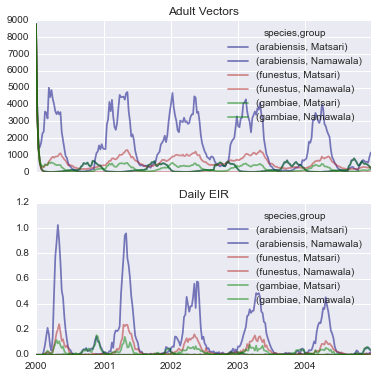

In [6]:
%matplotlib inline
draw_plots(sm, analyzers)